# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 14 February, 2025


In [2]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt


### Scenario no 01 : Security Camera Footage Analysis
You are working for a company that develops security systems. Your task is to identify suspicious movements or
objects in the captured footage. Use Canny edge detection to process a sample security camera image and
experiment with different threshold values to detect edges of objects more effectively (e.g., cars, people, or bags).

#### Question to Explore:
How do different threshold values impact the clarity of detected objects?

The impact of different threshold values in Canny edge detection on the clarity of detected objects can be understood as follows:

#### Low Threshold Values (e.g., 10, 60)

- Effect: Detects more edges, including noise.
- Clarity: Can result in cluttered edges, especially in noisy or textured areas.
- Use Case: Useful when detecting faint or fine edges.

#### Medium Threshold Values (e.g., 50, 150)

- Effect: Balances between detecting significant edges and avoiding noise.
- Clarity: Produces cleaner and more interpretable edges for objects like people or vehicles.
- Use Case: Commonly used for general-purpose edge detection.

#### High Threshold Values (e.g., 100, 200)

- Effect: Detects only the most prominent edges, ignoring fine details.
- Clarity: Results in clean, distinct edges but may miss subtle features like bags or small objects.
- Use Case: Ideal for detecting large, well-defined objects. As in the 3rd picture we can easily identify the door.


Key Takeaway:
Lower thresholds capture more details but increase noise, while higher thresholds filter out noise but may miss smaller or subtler objects.

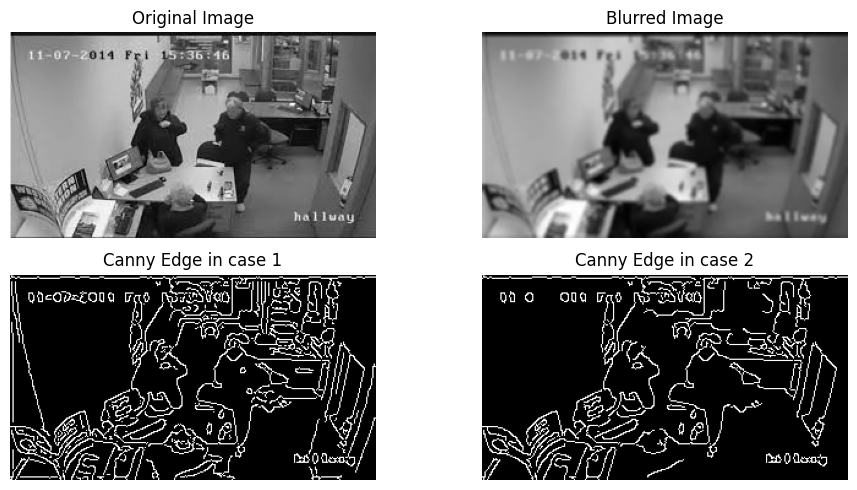

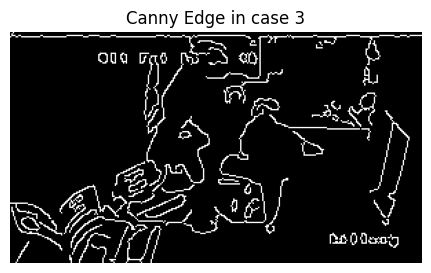

In [10]:
# Read the image in grayscale
image = cv2.imread('scanerio 1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny edge detection with different thresholds
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Blurred Image')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

Canny = cv2.Canny(blurred, 10, 60)
plt.subplot(2, 2, 3)
plt.title('Canny Edge in case 1')
plt.imshow(Canny, cmap='gray')
plt.axis('off')

Canny = cv2.Canny(blurred, 50, 150)
plt.subplot(2, 2, 4)
plt.title('Canny Edge in case 2')
plt.imshow(Canny, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
Canny = cv2.Canny(blurred, 100, 200)
plt.title('Canny Edge in case 3')
plt.imshow(Canny, cmap='gray')
plt.axis('off')

plt.show()

## Scenario no 02 : Road Sign Recognition for Self-Driving Cars
As part of a self-driving car project, you are working on detecting road signs from images. Use Sobel and
Laplacian gradients to enhance the edges of signs (e.g., speed limits, stop signs). Experiment with different
kernel sizes to see which provides the clearest detection of the sign's shape and text.

#### Question to Explore:

Which kernel size works best for detecting sharp edges of text on road signs?

### Effect of Different Kernel Sizes:

#### Small Kernel Sizes (e.g., 3, 5, 7)

- Effect: Captures fine details and text edges with high precision.
- Clarity: Useful for smaller text and intricate shapes like digits in speed signs.
- Downside: More sensitive to noise, which can cause false edges.

#### Medium Kernel Sizes (e.g., 15, 21)

- Effect: Balances detail detection and noise reduction.
- Clarity: Suitable for most standard road signs with moderate text size.
- Use Case: Ideal when signs have clear text and you want a good signal-to-noise ratio.

#### Large Kernel Sizes (e.g., 31, 45)

- Effect: Focuses on larger, more prominent edges.
- Clarity: Good for detecting the overall shape of large signs but may blur text details.
- Use Case: Useful if the sign is distant or the text is bold and large.

#### Recommended Kernel Size:
5 or 7: For sharp text detection on standard road signs.

15 or 21: If you want to balance clarity with noise reduction.

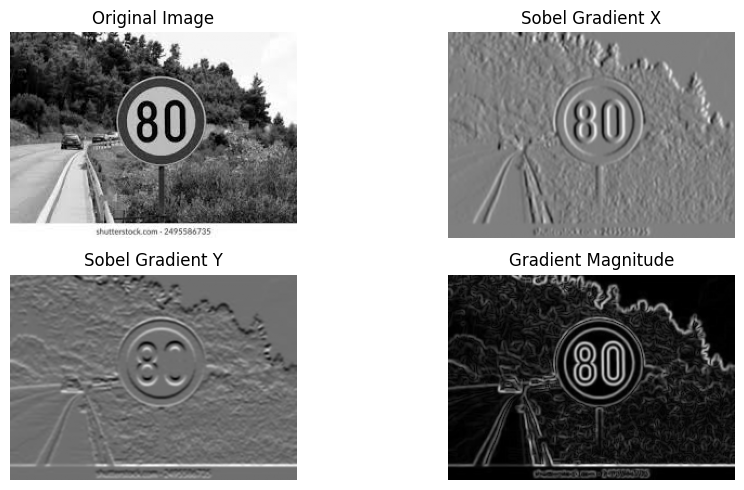

In [31]:
image2 = cv2.imread('scanerio 2.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel gradients with kernel size 31
grad_x = cv2.Sobel(image2, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(image2, cv2.CV_64F, 0, 1, ksize=5)

gradient_magnitude = cv2.magnitude(grad_x, grad_y)

plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image2, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Sobel Gradient X')
plt.imshow(grad_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Sobel Gradient Y')
plt.imshow(grad_y, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


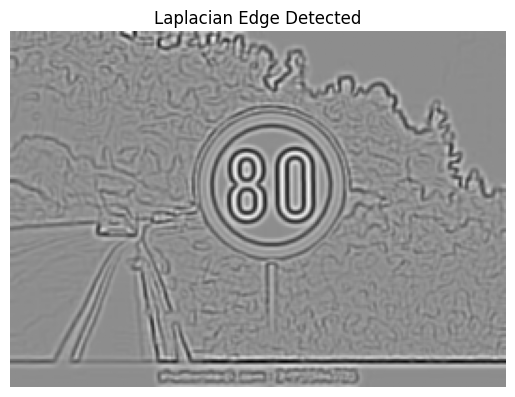

In [33]:
# Apply Laplacian filter with kernel size 5
Laplacian = cv2.Laplacian(gradient_magnitude, cv2.CV_32F, ksize=5)

plt.title('Laplacian Edge Detected')
plt.imshow(Laplacian, cmap='gray')
plt.axis('off')

plt.show()

## Scenario 03: Medical Image Analysis (CT Scan or X-ray)
You are assisting in medical diagnostics by analyzing X-ray images. Use Laplacian edge detection to highlight
fractures or sharp changes in bone structure from an X-ray image. Test different kernel sizes to find the one that
best identifies the edges of fractures.

#### Question to Explore:

How does changing the kernel size affect the detection of small fractures or bone outlines?

#### Small Kernel Size (e.g., 3)

- Effect: Detects fine details like small fractures or subtle bone irregularities.
- Pros: High sensitivity to minor edges and fractures.
- Cons: Can also amplify noise, leading to false positives.

#### Medium Kernel Size (e.g., 7)

- Effect: Balances sensitivity and noise reduction.
- Pros: Detects moderate details while suppressing some - noise.
- Cons: May miss very small fractures.

#### Large Kernel Size (e.g., 21)

- Effect: Focuses on broader structural features rather than tiny details.
- Pros: Good for detecting large, well-defined fractures and bone edges.
- Cons: May overlook small, hairline fractures.

Key Takeaway:
For detecting small fractures: Use a smaller kernel size (3 or 5).

For larger structural patterns: Use a larger kernel size (15 or 21).

Kernel size 7 is often a good compromise for both small fractures and structural clarity.

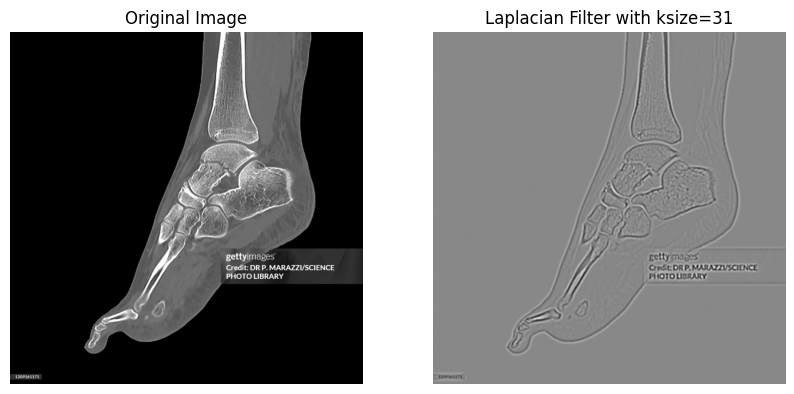

In [39]:
image3 = cv2.imread('scanerio 3.jpg',cv2.IMREAD_GRAYSCALE)
Laplacian = cv2.Laplacian(image3,cv2.CV_32F,ksize=31)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image3,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Laplacian Filter with ksize=31')
plt.imshow(Laplacian,cmap='gray')
plt.axis('off')
plt.show()

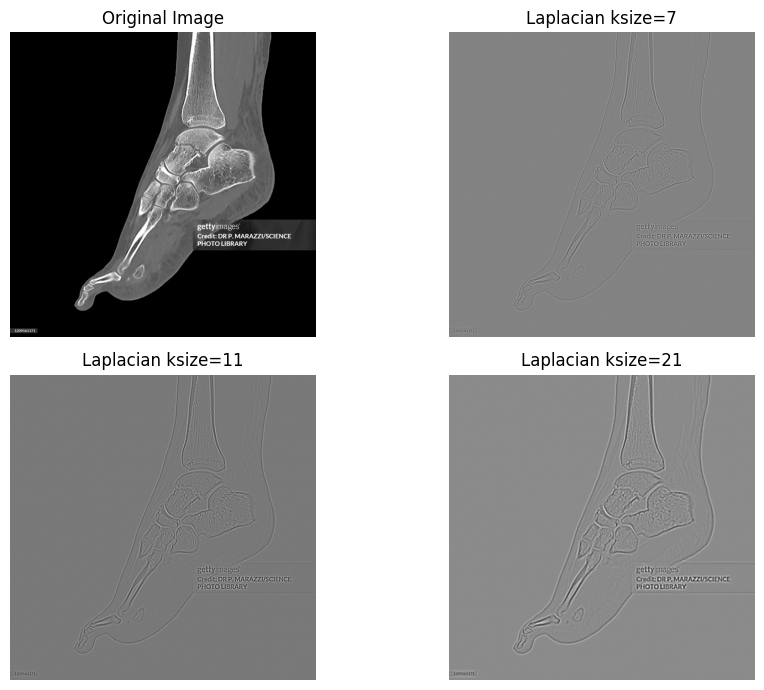

In [37]:
image3 = cv2.imread('scanerio 3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection with different kernel sizes
plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image3, cmap='gray')
plt.axis('off')

# Laplacian with kernel size 7
Laplacian_7 = cv2.Laplacian(image3, cv2.CV_32F, ksize=7)
plt.subplot(2, 2, 2)
plt.title('Laplacian ksize=7')
plt.imshow(Laplacian_7, cmap='gray')
plt.axis('off')

# Laplacian with kernel size 7
Laplacian_11 = cv2.Laplacian(image3, cv2.CV_32F, ksize=11)
plt.subplot(2, 2, 3)
plt.title('Laplacian ksize=11')
plt.imshow(Laplacian_11, cmap='gray')
plt.axis('off')

# Laplacian with kernel size 21
Laplacian_21 = cv2.Laplacian(image3, cv2.CV_32F, ksize=21)
plt.subplot(2, 2, 4)
plt.title('Laplacian ksize=21')
plt.imshow(Laplacian_21, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Scenario 04: Object Detection in Satellite Images
You are analyzing satellite images to detect man-made structures like roads, bridges, or buildings. Use Canny
edge detection to highlight the structures. Experiment with threshold values to reduce noise and detect edges of
interest more accurately.

#### Question to Explore:

What challenges arise when working with noisy satellite images, and how can edge
detection methods be adjusted to address them?

Working with noisy satellite images poses challenges such as obscured details, disrupted edge detection, and false artifacts. To address these issues, edge detection methods can be improved by:

- Preprocessing: Noise reduction through Gaussian or median filtering smooths out noise before edge detection.
- Refining Algorithms: Adjusting edge detection filters (e.g., Sobel, Canny) and using multi-scale techniques help capture real edges despite noise.
- Machine Learning: Leveraging deep learning models trained on noisy images can differentiate between actual features and noise, enhancing edge detection accuracy.

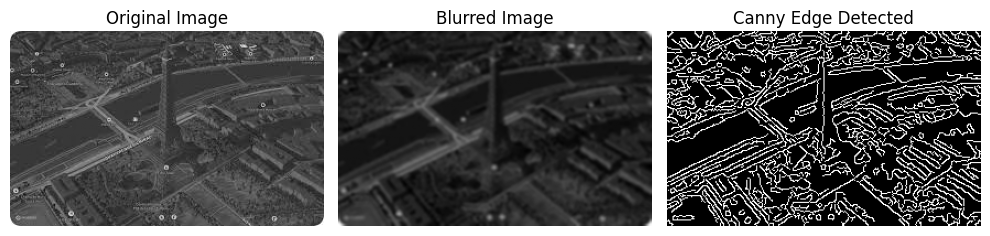

In [41]:
image4 = cv2.imread('scanerio 4.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred2 = cv2.GaussianBlur(image4, (5, 5), 1.4)
Canny2 = cv2.Canny(blurred2, 10, 60)

plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image4, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Blurred Image')
plt.imshow(blurred2, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Canny Edge Detected')
plt.imshow(Canny2, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()